Library import
=============

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cross_validation import train_test_split
from sklearn import datasets
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn import cross_validation
from sklearn.model_selection import StratifiedKFold

C:\Programs\Anaconda\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Dataset import
============

In [2]:
data = datasets.load_wine()

target = data.target
data = data.data

print(data)
# print(target)

[[1.423e+01 1.710e+00 2.430e+00 ... 1.040e+00 3.920e+00 1.065e+03]
 [1.320e+01 1.780e+00 2.140e+00 ... 1.050e+00 3.400e+00 1.050e+03]
 [1.316e+01 2.360e+00 2.670e+00 ... 1.030e+00 3.170e+00 1.185e+03]
 ...
 [1.327e+01 4.280e+00 2.260e+00 ... 5.900e-01 1.560e+00 8.350e+02]
 [1.317e+01 2.590e+00 2.370e+00 ... 6.000e-01 1.620e+00 8.400e+02]
 [1.413e+01 4.100e+00 2.740e+00 ... 6.100e-01 1.600e+00 5.600e+02]]


Dyskretyzacja
===============

In [3]:
bins = np.linspace(0, 1, 10)
digitized = np.digitize(data, bins)
bin_means = [data[digitized == i].mean() for i in range(1, len(bins))]
print(bin_means)

[nan, 0.19250000000000003, 0.28142857142857136, 0.39274509803921565, 0.5028571428571429, 0.6048076923076924, 0.7203125, 0.8311764705882353, 0.9386938775510203]


C:\Programs\Anaconda\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: Mean of empty slice.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Programs\Anaconda\lib\site-packages\numpy\core\_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [4]:
X_train, X_test, Y_train, Y_test = train_test_split(data, target, test_size=0.20, random_state=choosen_random_state)

NameError: name 'choosen_random_state' is not defined

Klasyfikator oparty o rozkład Gaussowski (normalny)
---------------

In [297]:
clf = GaussianNB()
clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)

Klasyfikator oparty o rozkład typu Multinomial
---------------

In [302]:
clf = MultinomialNB()
clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)

In [303]:
print (classification_report(Y_test, Y_pred))
%timeit clf.fit(X_train, Y_train)

             precision    recall  f1-score   support

        0.0       0.75      0.73      0.74       157
        1.0       0.46      0.49      0.47        74

avg / total       0.66      0.65      0.65       231

591 µs ± 8.97 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


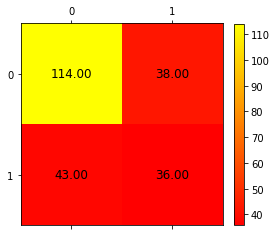

In [310]:
cm = metrics.confusion_matrix(Y_test, Y_pred)
img = plt.matshow(cm, cmap=plt.cm.autumn)
plt.colorbar(img, fraction=0.045)
for x in range(cm.shape[0]):
    for y in range(cm.shape[1]):
        plt.text(x, y, "%0.2f" % cm[x,y], 
                 size=12, color='black', ha="center", va="center")
plt.show()

CrossValidation
--------------------
Data splitting
-------------

In [345]:
choosen_random_state = 0
cv_folds = 10
workers = -1

scores = cross_validation.cross_val_score(clf, X_train, Y_train, cv=cv_folds, scoring= 'accuracy', n_jobs=workers)
print ("%s -> Accuracy in cross validation: średnia = %0.3f odch. st. = %0.3f" % (clf, np.mean(scores), np.std(scores)))

scores = cross_validation.cross_val_score(clf, X_train, Y_train, cv=cv_folds, scoring= 'precision', n_jobs=workers)
print ("%s -> Precisio in cross validation: średnia = %0.3f odch. st. = %0.3f" % (clf, np.mean(scores), np.std(scores)))

scores = cross_validation.cross_val_score(clf, X_train, Y_train, cv=cv_folds, scoring= 'recall', n_jobs=workers)
print ("%s -> Recall in cross validation: średnia = %0.3f odch. st. = %0.3f" % (clf, np.mean(scores), np.std(scores)))

scores = cross_validation.cross_val_score(clf, X_train, Y_train, cv=cv_folds, scoring= 'f1', n_jobs=workers)
print ("%s -> F1 in cross validation: średnia = %0.3f odch. st. = %0.3f" % (clf, np.mean(scores), np.std(scores)))


MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True) -> Accuracy in cross validation: średnia = 0.584 odch. st. = 0.049
MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True) -> Precisio in cross validation: średnia = 0.427 odch. st. = 0.068
MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True) -> Recall in cross validation: średnia = 0.453 odch. st. = 0.135
MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True) -> F1 in cross validation: średnia = 0.432 odch. st. = 0.095


In [326]:
print ("Trafność:", metrics.accuracy_score(Y_test, Y_pred))
print ("Precyzja:", metrics.precision_score(Y_test, Y_pred, average='weighted'))
print ("Czułość:", metrics.recall_score(Y_test, Y_pred, average='weighted'))
print ("Wskaźnik F1:", metrics.f1_score(Y_test, Y_pred, average='weighted'))

Trafność: 0.6493506493506493
Precyzja: 0.6557208614170639
Czułość: 0.6493506493506493
Wskaźnik F1: 0.6522432450473571


In [317]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
y_pred = cross_val_predict(clf,X_train,Y_train,cv=10)
conf_mat = confusion_matrix(Y_train,Y_pred)

ValueError: Found input variables with inconsistent numbers of samples: [537, 231]